In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from scipy import stats
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

In [16]:
data=pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [17]:
#No Null values found
data.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [18]:
data["Attrition"].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

In [19]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [21]:
cols=data.columns.to_list()
for i in cols:
    if len(data[i].value_counts())== 1:
        print(i,"-->",len(data[i].value_counts()))
#The Columns below has only one unique value in all the rows which doesnot affect the model performance
print("The Shape of the data before removing  :",data.shape)
data=data.drop(['EmployeeCount','Over18','StandardHours'],axis=1)
print("The Shape of the data after removing :",data.shape)

EmployeeCount --> 1
Over18 --> 1
StandardHours --> 1
The Shape of the data before removing  : (1470, 35)
The Shape of the data after removing : (1470, 32)


In [22]:
data_objects=data.dtypes[data.dtypes==object].index.to_list()
for i in data_objects:
    print(i,"-->",data[i].value_counts())
    print()

Attrition --> Attrition
No     1233
Yes     237
Name: count, dtype: int64

BusinessTravel --> BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64

Department --> Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

EducationField --> EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64

Gender --> Gender
Male      882
Female    588
Name: count, dtype: int64

JobRole --> JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64

MaritalStatus --> Mar

In [23]:
label_encoder=LabelEncoder()
for i in data_objects:
    data[i]=label_encoder.fit_transform(data[i])
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,7,1,...,3,4,1,6,3,3,2,2,2,2


In [24]:
z_scores = np.abs(stats.zscore(data.select_dtypes(include=[np.number])))
z_scores_df = pd.DataFrame(z_scores, columns=data.select_dtypes(include=[np.number]).columns)
threshold = 3
rows_to_keep = (z_scores_df <= threshold).all(axis=1)
df_cleaned = data[rows_to_keep]
data=df_cleaned[:]

In [25]:
data.corr()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159366,0.022340,0.021946,-0.038242,-0.011265,0.198502,-0.032676,-0.002704,0.014098,...,-0.000617,0.041744,0.054506,0.636136,-0.019008,-0.016913,0.177620,0.121508,0.103632,0.121747
Attrition,-0.159366,1.000000,-0.001041,-0.057220,0.063637,0.081788,-0.032703,0.023585,-0.010169,-0.112393,...,0.010781,-0.052344,-0.136676,-0.185619,-0.057285,-0.062492,-0.166455,-0.171015,-0.029263,-0.162297
BusinessTravel,0.022340,-0.001041,1.000000,-0.004606,-0.003521,-0.032873,-0.010560,0.022576,-0.013273,0.001183,...,-0.018274,-0.029660,-0.015159,0.029818,0.010322,-0.014140,-0.027164,-0.029257,-0.027283,-0.044321
DailyRate,0.021946,-0.057220,-0.004606,1.000000,-0.005398,-0.008171,-0.018442,0.040645,-0.044886,0.033123,...,0.000574,0.004516,0.048361,0.046173,0.005861,-0.044266,-0.003580,0.022899,-0.043870,-0.011516
Department,-0.038242,0.063637,-0.003521,-0.005398,1.000000,0.023919,0.012846,0.013432,-0.007828,-0.014540,...,-0.039364,-0.037705,-0.003424,-0.016246,0.036092,0.026978,0.032583,0.065536,0.048931,0.034216
DistanceFromHome,-0.011265,0.081788,-0.032873,-0.008171,0.023919,1.000000,0.001084,0.005882,0.029477,-0.019279,...,0.023678,0.007885,0.049976,-0.001092,-0.034386,-0.034398,0.011579,0.019039,0.006635,-0.000221
Education,0.198502,-0.032703,-0.010560,-0.018442,0.012846,0.001084,1.000000,-0.038017,0.042707,-0.026223,...,-0.023487,-0.002393,0.028494,0.125613,-0.026879,0.007844,0.033313,0.058007,0.042517,0.031210
EducationField,-0.032676,0.023585,0.022576,0.040645,0.013432,0.005882,-0.038017,1.000000,0.000058,0.047924,...,-0.003621,-0.013734,-0.015355,-0.012375,0.050502,0.034038,-0.012950,-0.010614,0.034094,0.013437
EmployeeNumber,-0.002704,-0.010169,-0.013273,-0.044886,-0.007828,0.029477,0.042707,0.000058,1.000000,0.011003,...,-0.027355,-0.063017,0.063896,-0.010440,0.018555,0.006280,0.004058,-0.001112,-0.003801,-0.006224
EnvironmentSatisfaction,0.014098,-0.112393,0.001183,0.033123,-0.014540,-0.019279,-0.026223,0.047924,0.011003,1.000000,...,-0.025299,0.018414,0.013330,-0.001669,-0.019318,0.032492,0.006621,0.038837,0.027943,0.001606


In [26]:
corr=data.corr()["Attrition"]
for i in range(len(corr)):
    print(data.columns[i],"-->",np.round(corr[i],5))

Age --> -0.15937
Attrition --> 1.0
BusinessTravel --> -0.00104
DailyRate --> -0.05722
Department --> 0.06364
DistanceFromHome --> 0.08179
Education --> -0.0327
EducationField --> 0.02359
EmployeeNumber --> -0.01017
EnvironmentSatisfaction --> -0.11239
Gender --> 0.03625
HourlyRate --> -0.00153
JobInvolvement --> -0.13396
JobLevel --> -0.17197
JobRole --> 0.06428
JobSatisfaction --> -0.11421
MaritalStatus --> 0.16096
MonthlyIncome --> -0.16185
MonthlyRate --> 0.01489
NumCompaniesWorked --> 0.05031
OverTime --> 0.25724
PercentSalaryHike --> -0.00627
PerformanceRating --> 0.01078
RelationshipSatisfaction --> -0.05234
StockOptionLevel --> -0.13668
TotalWorkingYears --> -0.18562
TrainingTimesLastYear --> -0.05728
WorkLifeBalance --> -0.06249
YearsAtCompany --> -0.16645
YearsInCurrentRole --> -0.17102
YearsSinceLastPromotion --> -0.02926
YearsWithCurrManager --> -0.1623


In [27]:
X=data.drop('Attrition',axis=1)
y=data['Attrition']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=31)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(1109, 31) (278, 31) (1109,) (278,)


In [28]:
import seaborn as sns

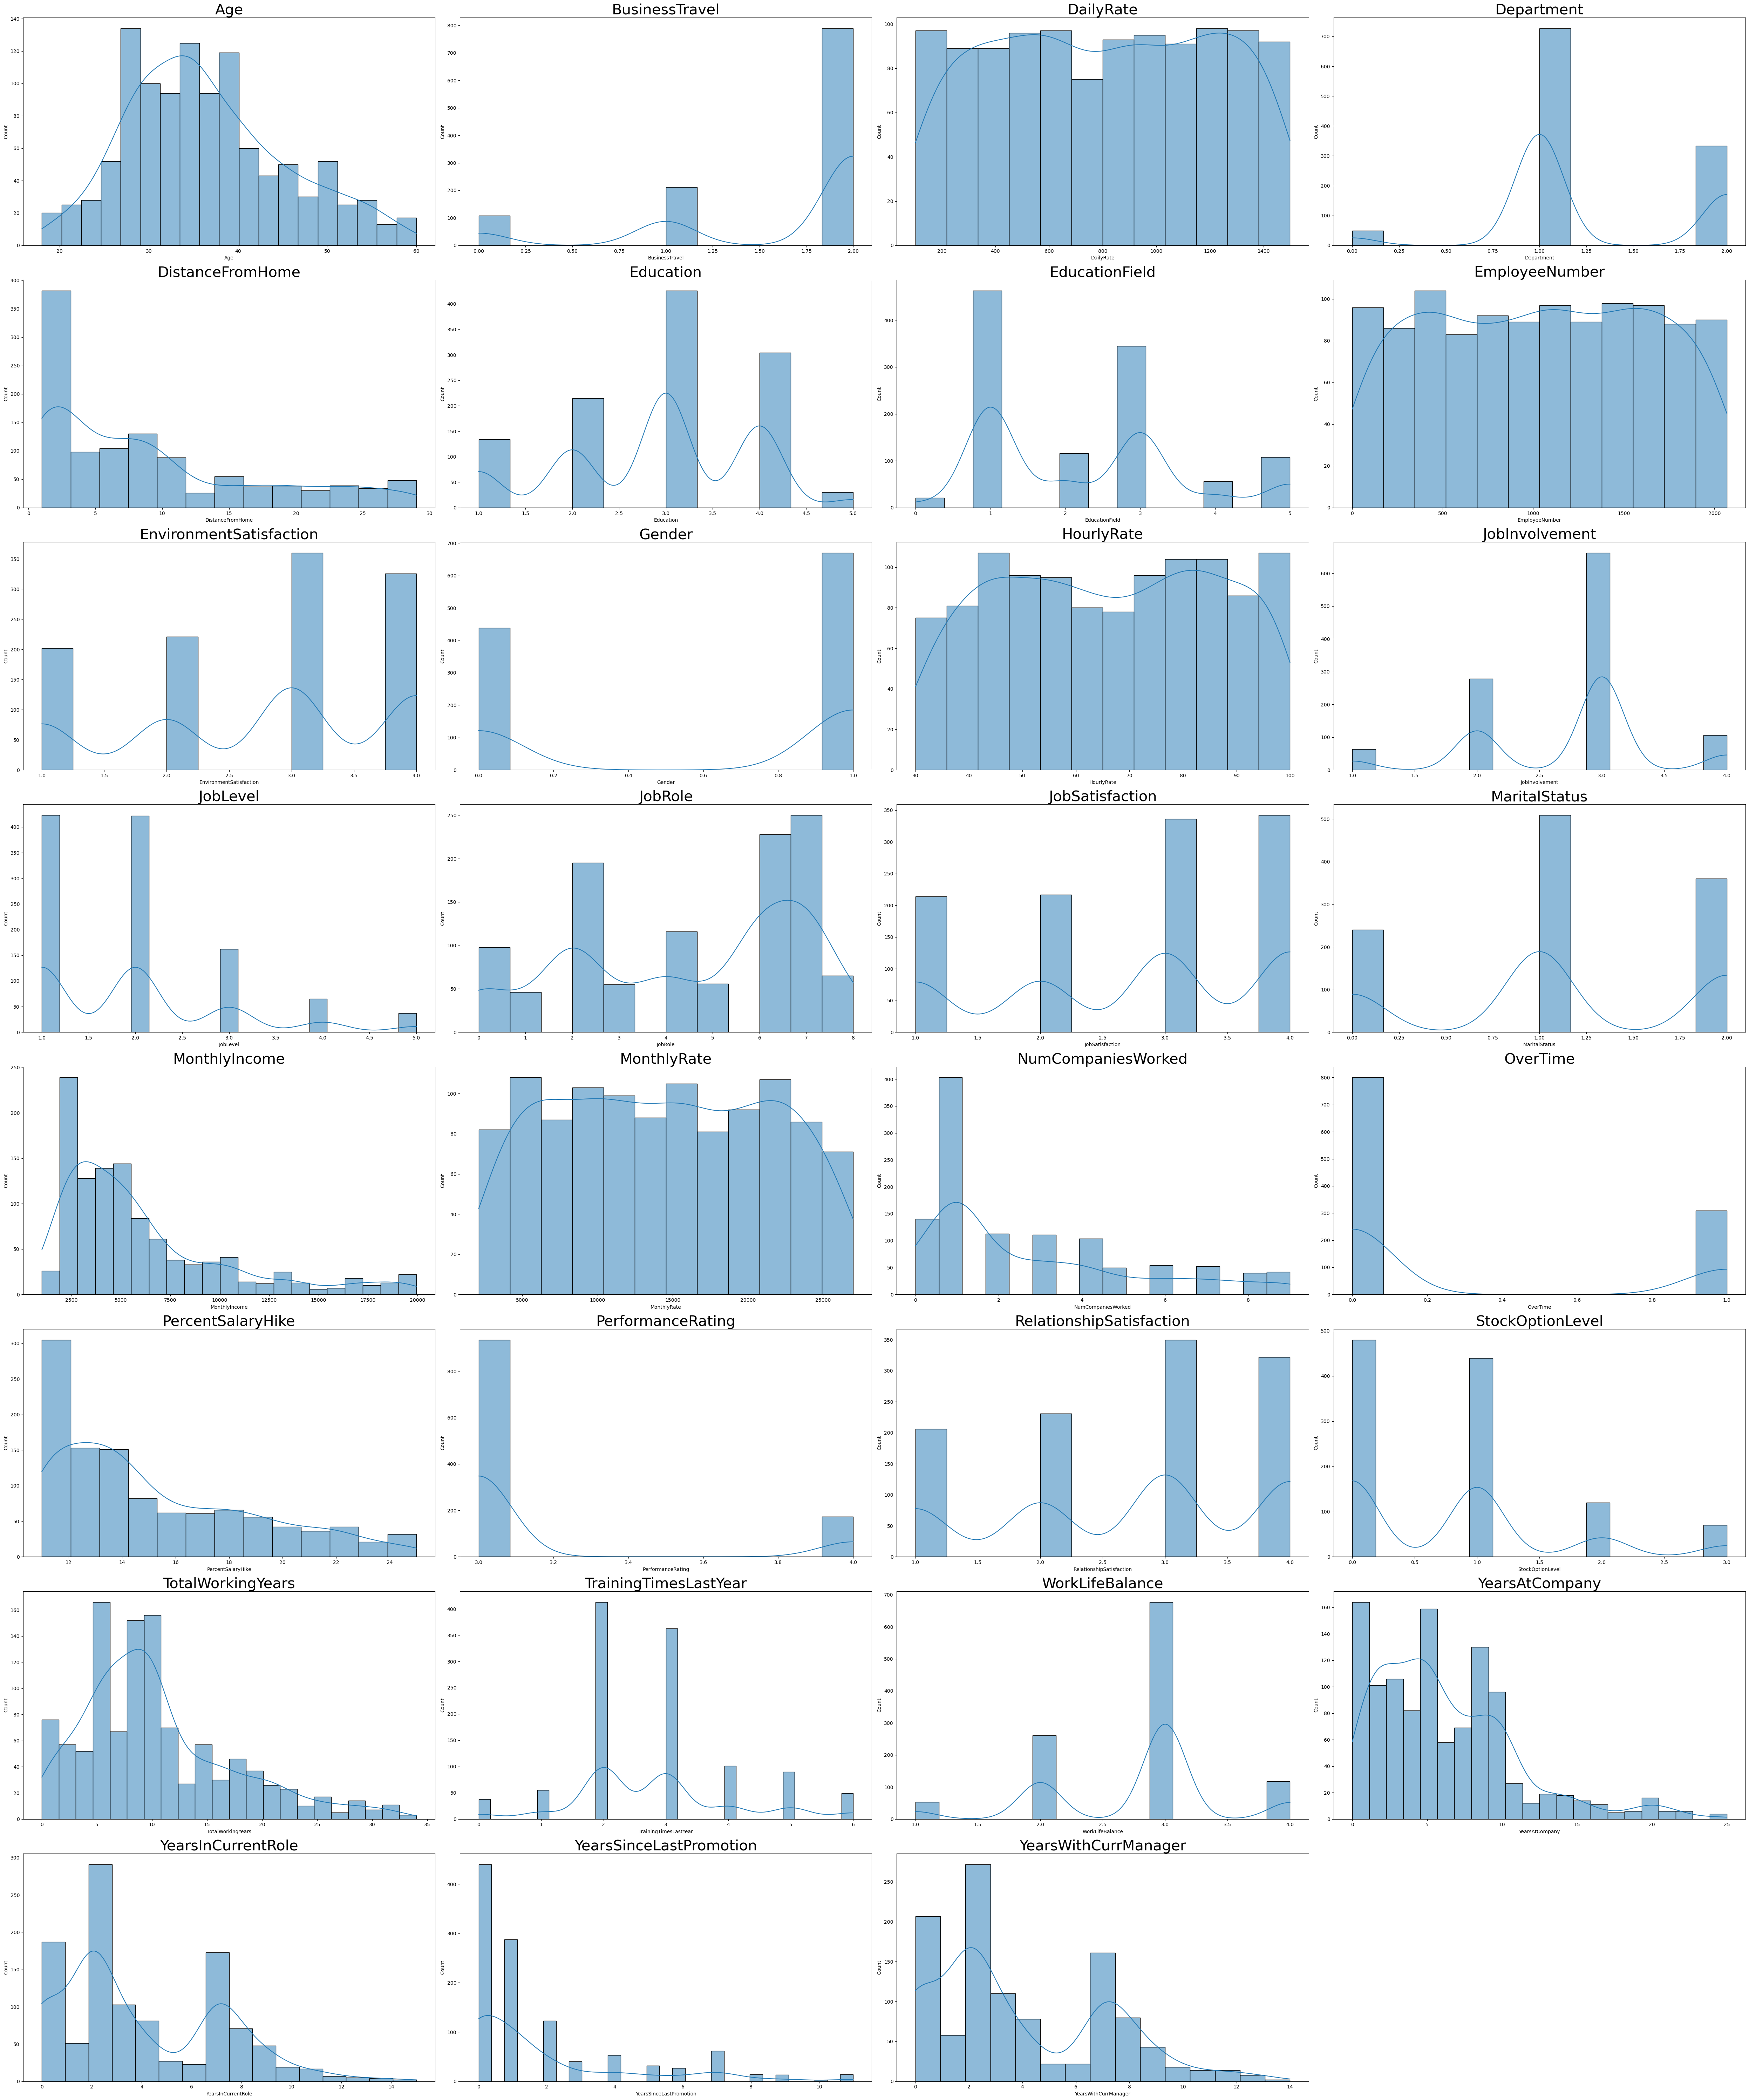

In [29]:
num_features = len(X_train.columns)
num_rows = (num_features // 4) + (1 if num_features % 4 != 0 else 0)

fig, axs = plt.subplots(num_rows, 4, figsize=(50, num_rows * 7.5))
count = 0
cols = X_train.columns.to_list()

for i in range(num_rows):
    for j in range(4):
        if count < num_features:
            sns.histplot(X_train[cols[count]], ax=axs[i, j], kde=True)
            axs[i, j].set_title(cols[count], fontsize=30)
            count += 1
        else:
            axs[i, j].axis('off')

plt.tight_layout()
plt.show()

In [32]:
clf = LogisticRegression(solver= 'lbfgs', multi_class = 'multinomial').fit(X_train, y_train)
ypred = clf.predict(X_test)
yProba = clf.predict_proba(X_test)

In [33]:
print("Accuarcy of the Logistic Regression is :",np.round(clf.score(X_test, y_test),2))

Accuarcy of the Logistic Regression is : 0.87


In [34]:
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       241
           1       0.67      0.05      0.10        37

    accuracy                           0.87       278
   macro avg       0.77      0.52      0.52       278
weighted avg       0.85      0.87      0.82       278



In [35]:
confusion_matrix(y_test, ypred)

array([[240,   1],
       [ 35,   2]])

In [36]:
yProba=clf.predict_proba(X_test)

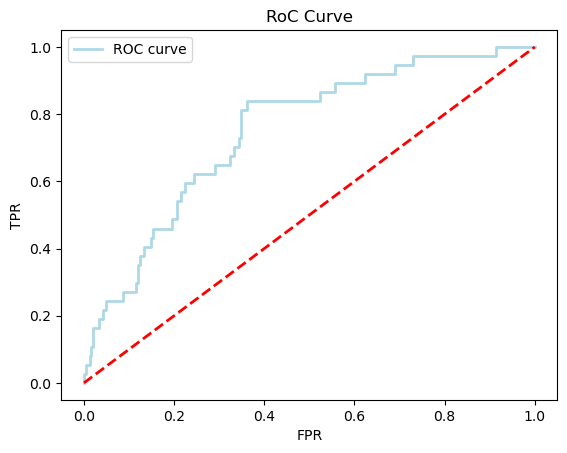

In [37]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, yProba[:,1], pos_label=1)
plt.figure()
plt.plot(fpr, tpr, color='lightblue', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('RoC Curve')
plt.legend()